# Opdracht 14

Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portofolio assignment 4.

- Do you expect there to be a correlation between the two columns
- Create a contigency table. Do you observe different rations between categories here
- Create a bar plot for this contigency table. Do you observe different ratios between categories hiere
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns

In [1]:
import pandas as pd

from scipy.stats import chi2_contingency

In [2]:
grades = pd.read_csv("StudentsPerformance.csv")
grades.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Correlatie tussen Parental Level of Education & Race/Ethnicity

Ik verwacht dat er hier een sterke correlatie tussen te vinden

In [3]:
grouped = grades.groupby(["race/ethnicity", "parental level of education"]).mean().unstack("race/ethnicity")
grouped

math score                                   \
race/ethnicity                 group A    group B    group C    group D   
parental level of education                                               
associate's degree           61.000000  66.097561  66.730769  67.600000   
bachelor's degree            67.166667  69.300000  68.150000  67.571429   
high school                  60.444444  59.791667  60.906250  62.863636   
master's degree              57.666667  67.166667  67.052632  72.521739   
some college                 63.888889  63.189189  65.130435  68.731343   
some high school             58.916667  61.815789  60.551020  66.760000   

                                       reading score                        \
race/ethnicity                 group E       group A    group B    group C   
parental level of education                                                  
associate's degree           74.897436     67.071429  69.585366  71.128205   
bachelor's degree            76.555556     68.083333  72.950000  75.675000   
high school                  70.772727     62.888889  63.458333  64.421875   
master's degree              74.625000     64.666667  80.166667  70.526316   
some college                 73.828571     65.777778  65.756757  69.420290   
some high school             72.111111     62.083333  66.447368  65.632653   

                                                  writing score             \
race/ethnicity                 group D    group E       group A    group B   
parental level of education                                                  
associate's degree           70.540000  73.820513     63.571429  68.243902   
bachelor's degree            70.142857  74.833333     68.333333  71.650000   
high school                  64.409091  70.318182     60.500000  61.250000   
master's degree              77.173913  82.125000     67.666667  77.166667   
some college                 70.880597  72.628571     65.000000  64.189189   
some high school             69.980000  69.555556     58.583333  64.605263   

                                                              
race/ethnicity                 group C    group D    group E  
parental level of education                                   
associate's degree           70.269231  69.860000  73.205128  
bachelor's degree            75.900000  71.892857  75.388889  
high school                  61.656250  63.159091  67.545455  
master's degree              69.526316  79.739130  80.500000  
some college                 68.869565  71.701493  70.200000  
some high school             63.285714  69.100000  66.555556

Hier valt niet enorm veel uit op te maken, dus maken we een grafiek op basis van de verschillende vakken

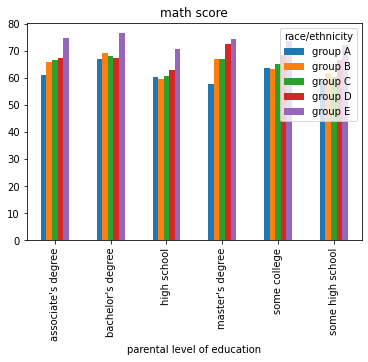

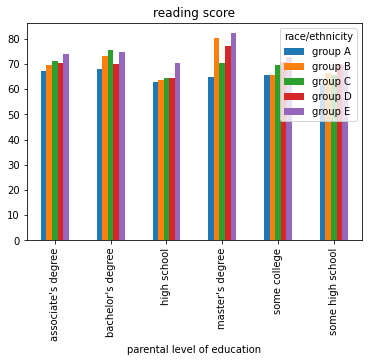

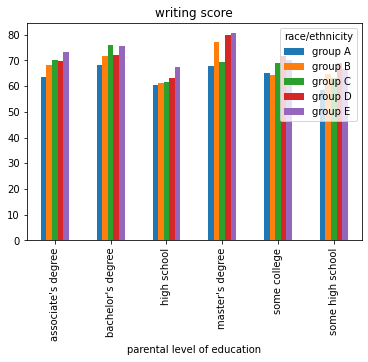

In [4]:
for subject in ["math score", "reading score", "writing score"]:
    grouped[subject].plot(kind="bar", title=subject)

Bij elke uitkomst is te zien dat masters degree duidelijk boven alle andere degrees uitstijgt.
Dit kunnen we confirmen met de chi-squared test.

In [5]:
chi2_contingency(grouped)

(6.440163697597559,
 1.0,
 70,
 array([[62.08106807, 65.15541221, 65.35056734, 68.29867512, 74.47884681,
         65.69543855, 70.37032589, 70.107903  , 71.1713049 , 74.56139324,
         64.53203176, 68.47644493, 68.88047866, 71.56256497, 72.89851303],
        [64.48187287, 67.67510832, 67.87781051, 70.93992779, 77.35909964,
         68.23601861, 73.09169363, 72.81912229, 73.92364817, 77.44483832,
         67.02762045, 71.12457233, 71.54423089, 74.33003909, 75.71765106],
        [57.32207184, 60.16074362, 60.34093859, 63.063051  , 68.76946451,
         60.65937274, 64.97589364, 64.7335875 , 65.71547138, 68.84568312,
         59.58515012, 63.22719337, 63.60025478, 66.07673834, 67.3102756 ],
        [65.36458767, 68.60153644, 68.80701349, 71.91104916, 78.41809529,
         69.17012522, 74.09227126, 73.81596861, 74.93561472, 78.50500768,
         67.94518488, 72.09822136, 72.52362477, 75.34756887, 76.75417634],
        [61.21447928, 64.24590869, 64.43833965, 67.34529484, 73.43919759,
   

De P waarde van de uitkomst is 100%. Er is dus totaal geen verband. 
Ik heb zelf het vermoeden dat ik de opdracht niet goed uitgevoerd heb.